# Fair Face Data Analysis

#### Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Load Data

In [ ]:
train_data1=pd.read_csv("/content/drive/MyDrive/fairface/fairface_label_train.csv")

In [ ]:
train_data=train_data1.copy()

In [ ]:
test_data1=pd.read_csv("/content/drive/MyDrive/fairface/fairface_label_val.csv")

In [ ]:
test_data=test_data1.copy()

In [ ]:
train_data.head()

,file,age,gender,race,service_test
0,train/1.jpg,50-59,Male,East Asian,True
1,train/2.jpg,30-39,Female,Indian,False
2,train/3.jpg,3-9,Female,Black,False
3,train/4.jpg,20-29,Female,Indian,True
4,train/5.jpg,20-29,Female,Indian,True


In [ ]:
test_data.head()

,file,age,gender,race,service_test
0,val/1.jpg,3-9,Male,East Asian,False
1,val/2.jpg,50-59,Female,East Asian,True
2,val/3.jpg,30-39,Male,White,True
3,val/4.jpg,20-29,Female,Latino_Hispanic,True
4,val/5.jpg,20-29,Male,Southeast Asian,False


### View Age Groups

In [ ]:
#age categories
train_data['age'] = pd.Categorical(train_data['age'])
print (train_data['age'].cat.categories)

Index(['0-2', '10-19', '20-29', '3-9', '30-39', '40-49', '50-59', '60-69',
       'more than 70'],
      dtype='object')


In [ ]:
#age categories
test_data['age'] = pd.Categorical(test_data['age'])
test_data['age'].cat.categories

Index(['0-2', '10-19', '20-29', '3-9', '30-39', '40-49', '50-59', '60-69',
       'more than 70'],
      dtype='object')

### Visualize Age Group Distribution

Train set

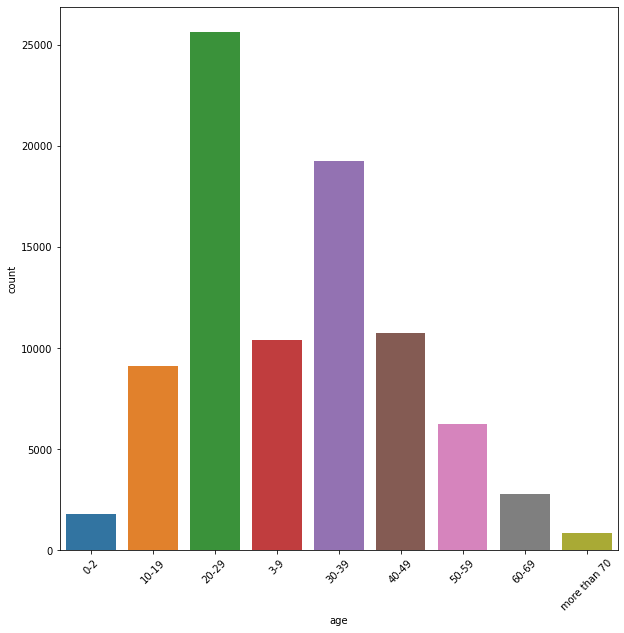

In [ ]:
plt.figure(figsize=(10,10))
chart=sns.countplot(x ='age', data = train_data)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45);

Test set

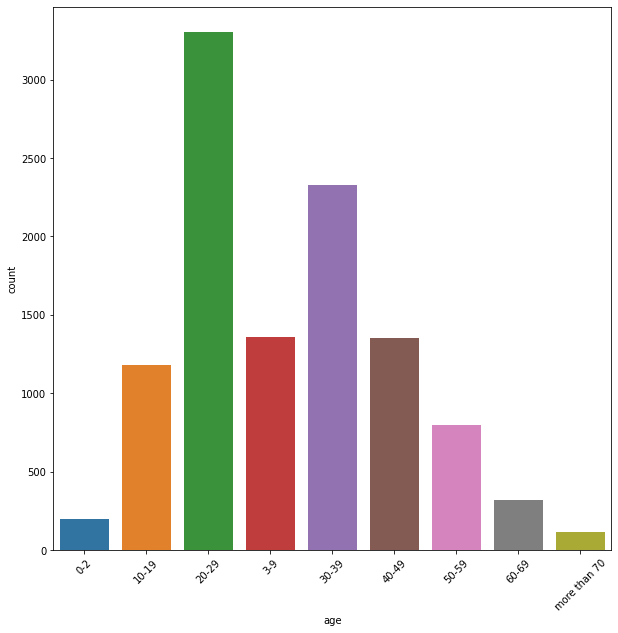

In [ ]:
plt.figure(figsize=(10,10))
chart=sns.countplot(x ='age', data = test_data)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45);

#### Create subset with file,gender and race

Train

In [ ]:
subset_train=train_data[['file','gender','race']]

In [ ]:
subset_train

,file,gender,race
0,train/1.jpg,Male,East Asian
1,train/2.jpg,Female,Indian
2,train/3.jpg,Female,Black
3,train/4.jpg,Female,Indian
4,train/5.jpg,Female,Indian
...,...,...,...
86739,train/86740.jpg,Male,Indian
86740,train/86741.jpg,Male,Indian
86741,train/86742.jpg,Female,Indian
86742,train/86743.jpg,Female,Black


Test

In [ ]:
subset_test=test_data[['file','gender','race']]

#### List of neccessary images in the train dataset

0-2

In [ ]:
#Filter age group '0-2'
train_0_2 = []
for i in train_data['age'] == '0-2':
  train_0_2.append(i)

In [ ]:
#convert to series
series = pd.Series((i in train_data['age'] == '0-2'))

In [ ]:
#Combine with subset
train_0_2=pd.concat([series,subset_train], axis=1)

In [ ]:
train_0_2

,age,file,gender,race
0,False,train/1.jpg,Male,East Asian
1,False,train/2.jpg,Female,Indian
2,False,train/3.jpg,Female,Black
3,False,train/4.jpg,Female,Indian
4,False,train/5.jpg,Female,Indian
...,...,...,...,...
86739,False,train/86740.jpg,Male,Indian
86740,False,train/86741.jpg,Male,Indian
86741,False,train/86742.jpg,Female,Indian
86742,False,train/86743.jpg,Female,Black


In [ ]:
#drop values that are 'True'
train_0_2.drop(train_0_2[train_0_2['age'] == True ].index , inplace=True)

In [ ]:
train_0_2

,age,file,gender,race
0,False,train/1.jpg,Male,East Asian
1,False,train/2.jpg,Female,Indian
2,False,train/3.jpg,Female,Black
3,False,train/4.jpg,Female,Indian
4,False,train/5.jpg,Female,Indian
...,...,...,...,...
86739,False,train/86740.jpg,Male,Indian
86740,False,train/86741.jpg,Male,Indian
86741,False,train/86742.jpg,Female,Indian
86742,False,train/86743.jpg,Female,Black


(The process above is repeated for each age group)

More than 70

In [ ]:
train_70 = []
for i in train_data['age'] == 'more than 70':
  train_70.append(i)

In [ ]:
series2 = pd.Series((i in train_data['age'] == 'more than 70'))

In [ ]:
train_70=pd.concat([series2,subset_train], axis=1)

In [ ]:
train_70.drop(train_70[train_70['age'] == True ].index , inplace=True)

In [ ]:
train_70

,age,file,gender,race
0,False,train/1.jpg,Male,East Asian
1,False,train/2.jpg,Female,Indian
2,False,train/3.jpg,Female,Black
3,False,train/4.jpg,Female,Indian
4,False,train/5.jpg,Female,Indian
...,...,...,...,...
86738,False,train/86739.jpg,Male,Middle Eastern
86739,False,train/86740.jpg,Male,Indian
86740,False,train/86741.jpg,Male,Indian
86742,False,train/86743.jpg,Female,Black


'10-19'

In [ ]:
train_10_19 = []
for i in train_data['age'] == '10-19':
  train_10_19.append(i)

In [ ]:
series3 = pd.Series((i in train_data['age'] == '10-19'))

In [ ]:
train_10_19=pd.concat([series3,subset_train], axis=1)

In [ ]:
train_10_19.drop(train_10_19[train_10_19['age'] == True ].index , inplace=True)

In [ ]:
train_10_19

,age,file,gender,race
0,False,train/1.jpg,Male,East Asian
1,False,train/2.jpg,Female,Indian
2,False,train/3.jpg,Female,Black
3,False,train/4.jpg,Female,Indian
4,False,train/5.jpg,Female,Indian
...,...,...,...,...
86736,False,train/86737.jpg,Male,Black
86738,False,train/86739.jpg,Male,Middle Eastern
86739,False,train/86740.jpg,Male,Indian
86741,False,train/86742.jpg,Female,Indian


#### List of unneccessary images in the test dataset

0-2

In [ ]:
test_0_2 = []
for i in test_data['age'] == '0-2':
  test_0_2.append(i)

In [ ]:
series4 = pd.Series((i in test_data['age'] == '0-2'))

In [ ]:
test_0_2=pd.concat([series4,subset_test], axis=1)

In [ ]:
test_0_2.drop(test_0_2[test_0_2['age'] == True ].index , inplace=True)

In [ ]:
test_0_2

,age,file,gender,race
0,False,val/1.jpg,Male,East Asian
1,False,val/2.jpg,Female,East Asian
2,False,val/3.jpg,Male,White
3,False,val/4.jpg,Female,Latino_Hispanic
4,False,val/5.jpg,Male,Southeast Asian
...,...,...,...,...
10949,False,val/10950.jpg,Male,White
10950,False,val/10951.jpg,Male,White
10951,False,val/10952.jpg,Male,Latino_Hispanic
10952,False,val/10953.jpg,Female,East Asian


More than 70

In [ ]:
test_70 = []
for i in test_data['age'] == 'more than 70':
  test_70.append(i)

In [ ]:
series5 = pd.Series((i in test_data['age'] == 'more than 70'))

In [ ]:
test_70=pd.concat([series5,subset_test], axis=1)

In [ ]:
test_70.drop(test_70[test_70['age'] == True ].index , inplace=True)

In [ ]:
test_70

,age,file,gender,race
0,False,val/1.jpg,Male,East Asian
1,False,val/2.jpg,Female,East Asian
2,False,val/3.jpg,Male,White
3,False,val/4.jpg,Female,Latino_Hispanic
4,False,val/5.jpg,Male,Southeast Asian
...,...,...,...,...
10949,False,val/10950.jpg,Male,White
10950,False,val/10951.jpg,Male,White
10951,False,val/10952.jpg,Male,Latino_Hispanic
10952,False,val/10953.jpg,Female,East Asian


10-19

In [ ]:
test_10_19 = []
for i in test_data['age'] == '10-19':
  test_10_19.append(i)

In [ ]:
series6 = pd.Series((i in test_data['age'] == '10-19'))

In [ ]:
test_10_19=pd.concat([series6,subset_test], axis=1)

In [ ]:
test_10_19.drop(test_10_19[test_10_19['age'] == True ].index , inplace=True)

In [ ]:
test_10_19

,age,file,gender,race
0,False,val/1.jpg,Male,East Asian
1,False,val/2.jpg,Female,East Asian
2,False,val/3.jpg,Male,White
3,False,val/4.jpg,Female,Latino_Hispanic
4,False,val/5.jpg,Male,Southeast Asian
...,...,...,...,...
10949,False,val/10950.jpg,Male,White
10950,False,val/10951.jpg,Male,White
10951,False,val/10952.jpg,Male,Latino_Hispanic
10952,False,val/10953.jpg,Female,East Asian


Print out lists

Trainset

In [ ]:
train_keep_age=pd.concat([train_0_2,train_10_19,train_70], axis=0)

In [ ]:
train_keep_age

,age,file,gender,race
0,False,train/1.jpg,Male,East Asian
1,False,train/2.jpg,Female,Indian
2,False,train/3.jpg,Female,Black
3,False,train/4.jpg,Female,Indian
4,False,train/5.jpg,Female,Indian
...,...,...,...,...
86738,False,train/86739.jpg,Male,Middle Eastern
86739,False,train/86740.jpg,Male,Indian
86740,False,train/86741.jpg,Male,Indian
86742,False,train/86743.jpg,Female,Black


In [ ]:
train_keep_age.to_csv('train_keep_age.csv')

testset

In [ ]:
test_keep_age=pd.concat([test_0_2,test_10_19,test_70], axis=0)

In [ ]:
test_keep_age

,age,file,gender,race
0,False,val/1.jpg,Male,East Asian
1,False,val/2.jpg,Female,East Asian
2,False,val/3.jpg,Male,White
3,False,val/4.jpg,Female,Latino_Hispanic
4,False,val/5.jpg,Male,Southeast Asian
...,...,...,...,...
10949,False,val/10950.jpg,Male,White
10950,False,val/10951.jpg,Male,White
10951,False,val/10952.jpg,Male,Latino_Hispanic
10952,False,val/10953.jpg,Female,East Asian


In [ ]:
test_keep_age.to_csv('test_keep_age.csv')